# **Setup**

In [1]:
!pip install pennylane-sf --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of pennylane-lightning to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# **Dependencies**

In [2]:
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt

In [3]:
import torch
import torchvision
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

In [4]:
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [5]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# **Loading Dataset (pytorch)**

In [6]:
mnist_dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

# Reduce dataset size
train_images = train_images[:150]
train_labels = train_labels[:150]
test_images = test_images[:35]
test_labels = test_labels[:35]

# Normalize pixel values within 0 and 1
train_images = train_images / 255

11490434/11490434 [==============================] - 0s 0us/step


# Quantum Hybird-CNN

In [7]:
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

In [8]:
n_layers = 6
weight_shapes = {"weights": (n_layers, n_qubits)}

In [9]:
qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

In [ ]:
train_images.reshape(-1,1,28,28)

In [30]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Flatten, Reshape


train_images = train_images/255.0
train_images = train_images.reshape(-1, 28, 28, 1)

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dense(n_qubits))
model.add(Activation('relu'))

model.add(qlayer)

model.add(tf.keras.layers.Reshape((4,169,10)))

model.add(Dense(n_qubits))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

train_images = np.array(train_images)
train_labels = np.array(train_labels)

model_history = model.fit(train_images, train_labels, batch_size=4, epochs=12, validation_split=0.3)

print(model.summary())
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.show()

ValueError: ignored

# **Implementation of classical CNN**
Classical Keras CNN for comparison purposes

Epoch 1/12
105/105 [==============================] - 3s 24ms/step - loss: 2.3080 - accuracy: 0.1143 - val_loss: 2.3012 - val_accuracy: 0.1333
Epoch 2/12
105/105 [==============================] - 2s 18ms/step - loss: 2.2986 - accuracy: 0.1143 - val_loss: 2.3004 - val_accuracy: 0.1333
Epoch 3/12
105/105 [==============================] - 3s 25ms/step - loss: 2.2926 - accuracy: 0.1524 - val_loss: 2.2990 - val_accuracy: 0.1333
Epoch 4/12
105/105 [==============================] - 3s 29ms/step - loss: 2.2890 - accuracy: 0.1524 - val_loss: 2.3033 - val_accuracy: 0.1333
Epoch 5/12
105/105 [==============================] - 2s 21ms/step - loss: 2.2853 - accuracy: 0.1524 - val_loss: 2.2970 - val_accuracy: 0.1333
Epoch 6/12
105/105 [==============================] - 2s 18ms/step - loss: 2.2885 - accuracy: 0.1524 - val_loss: 2.3094 - val_accuracy: 0.1333
Epoch 7/12
105/105 [==============================] - 2s 19ms/step - loss: 2.2755 - accuracy: 0.1524 - val_loss: 2.3182 - val_accuracy: 0.1333

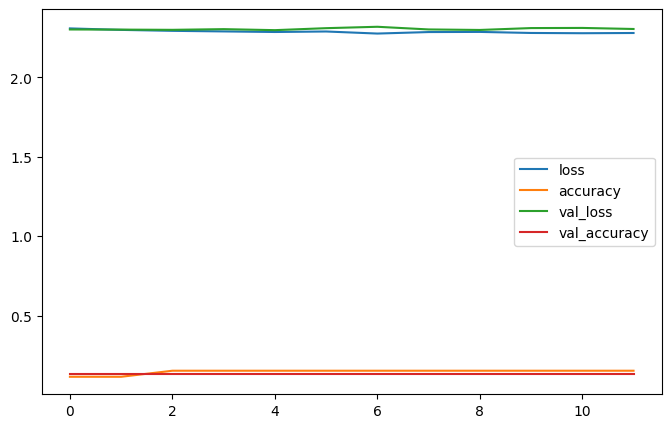

In [22]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

train_images = np.array(train_images)
train_labels = np.array(train_labels)

model_history = model.fit(train_images, train_labels, batch_size=1, epochs=12, validation_split=0.3)

print(model.summary())
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.show()